# Tarefa, manipulação de contornos paramétricos

Imagens NIST

## Load database

In [1]:
import sys
sys.path.append('../')
import sarpy.binaryScale 
import skimage.io as skio
import numpy as np
import matplotlib.pyplot as plt
from sarpy.datasets import load_nist
from sarpy import extractContours

dataset = load_nist()
%load_ext autoreload
%autoreload 2

print(len(dataset['bitmaps']), "images")
print(len(dataset['names']), "class")

6200 images
62 class


## Funções auxiliares

In [2]:
def gridVisualize(data, ncols,size):
    plt.rcParams["figure.figsize"] = [size[0],size[1]]
    x = ncols;
    y = int(np.ceil(len(data)/x))
    fig, axes = plt.subplots(y,x)
    k = i = j = 0
    for i in range(0,y):
        for j in range(0,x):
            axes[i,j].axis('off')
            if i*x+j < len(data):
                axes[i,j].imshow(data[k],cmap='gray')
                k = k + 1
    plt.show()
    
def fun(c,l=100): #problem type extractContours.extract_contours
    nrows = c.shape[0]
    a = np.array([0,0,0])
    for i in c[:]:
        a = np.vstack((a,i))
    a = a[1::]    
    b = np.array(a[0])
    for i in range(1,l):
        idx = int(np.floor(nrows*i/l))
        b = np.vstack((b,a[idx]))
    return b

## Imagens 

- Imagens da mesma classe

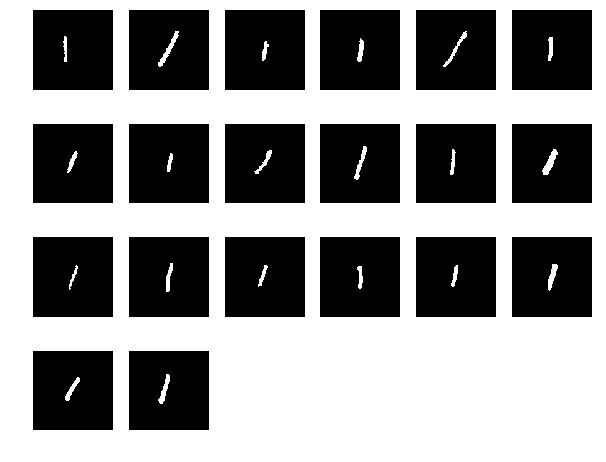

In [3]:
list_images = [];
for i in range(100,120):
    list_images.append(dataset['bitmaps'][i])

gridVisualize(list_images,6,(10,8))

## Normalizaçaõ de imagens
    - Tamanho ....
    - Deslocação ....
    -
    -

## Extract contours

    - Extrai o contorno parametrico das imagens

In [4]:
numbins = 100
list_con = []
arr_x = np.arange(0,numbins)

for img in list_images:
    aContour = extractContours.extract_contours(img)
    c = fun(aContour[0],numbins) # problem type in aContour
    list_con.append(c)
    
array_con = np.array(list_con)

## Mean and Standard deviation 

    - Calcula a média aritmética para os eixos X e Y do contorno parametrico
    - Calcula a desvio padrão para os eixos X e Y do contorno parametrico

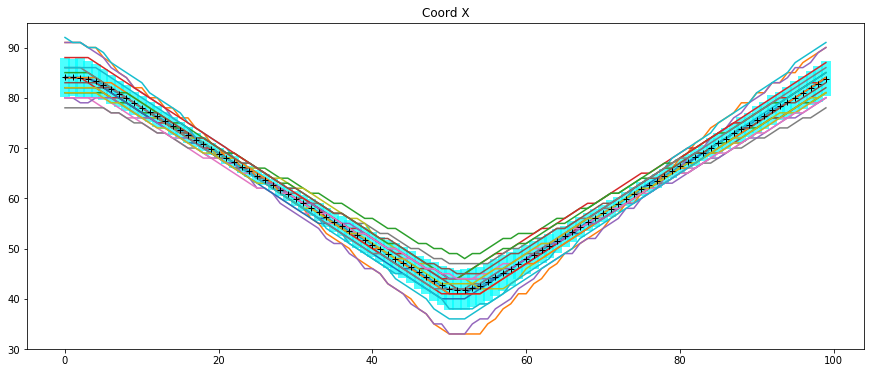

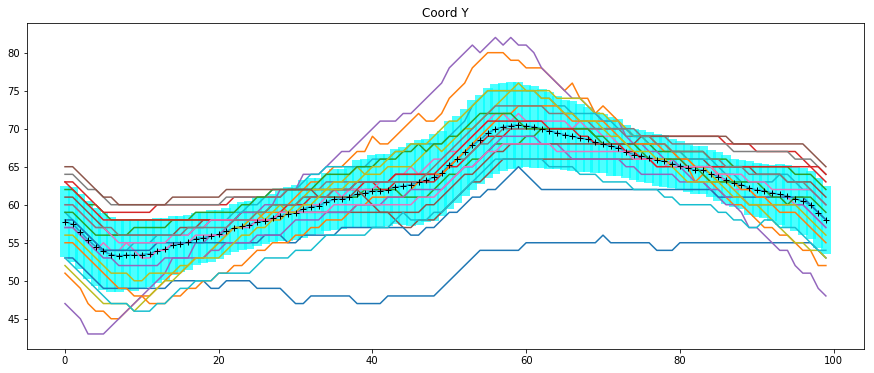

In [5]:
mm = np.mean(array_con,axis=0)
std = np.std(array_con,axis=0)

plt.rcParams["figure.figsize"] = [15,6]
for idx,title in zip([1,2],["Coord X","Coord Y"]):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    for contour in array_con:
        ax.plot(arr_x, contour[:,idx])
    ax.plot(arr_x, mm[:,idx],'+', color="black")
    plt.title(title)
    plt.errorbar(arr_x,mm[:,idx],yerr=std[:,idx],ecolor='cyan',elinewidth=10,zorder=-1,alpha=0.7)
    plt.show()

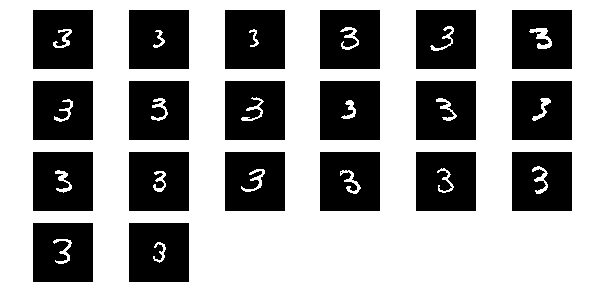

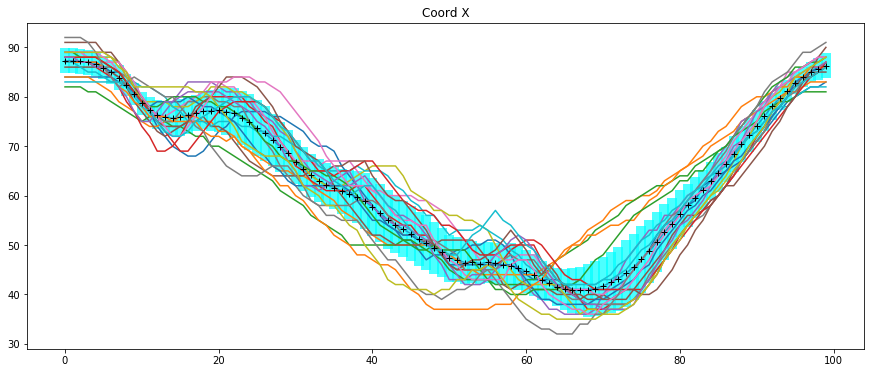

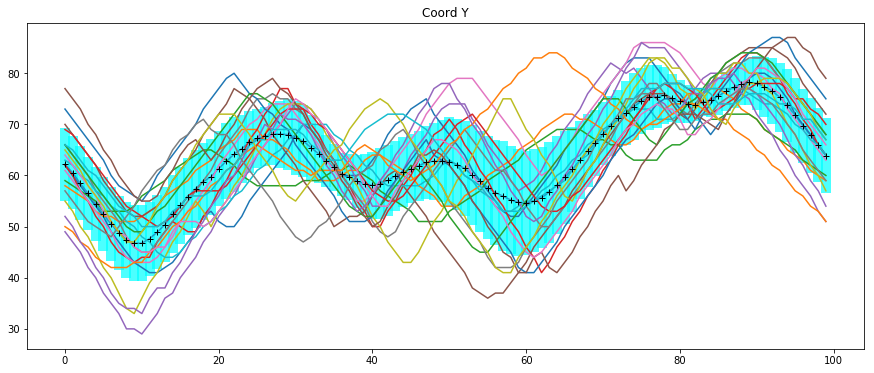

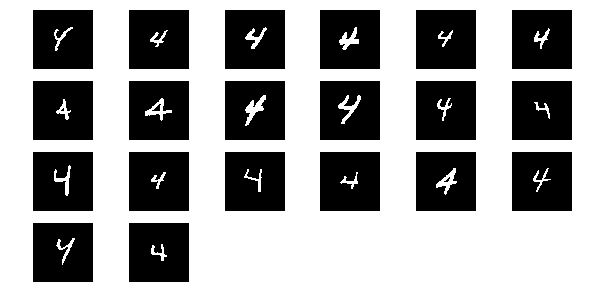

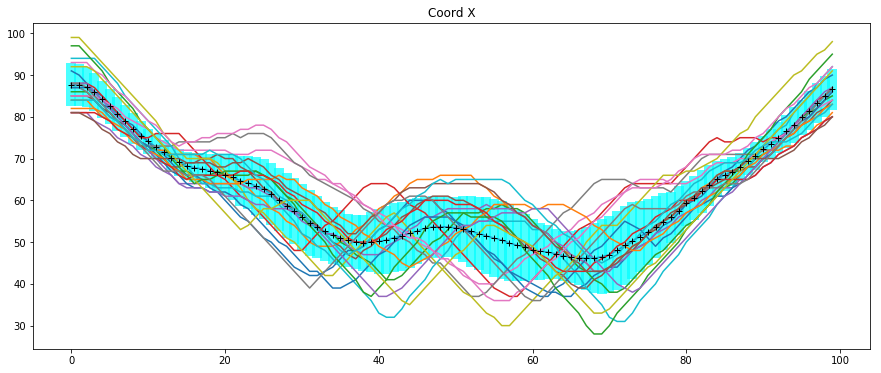

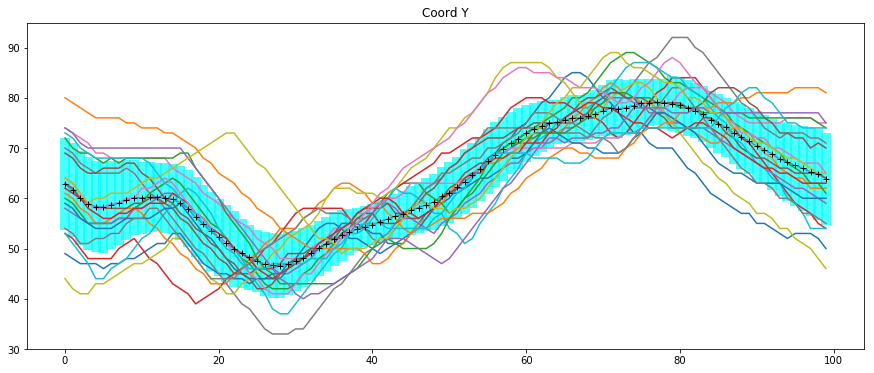

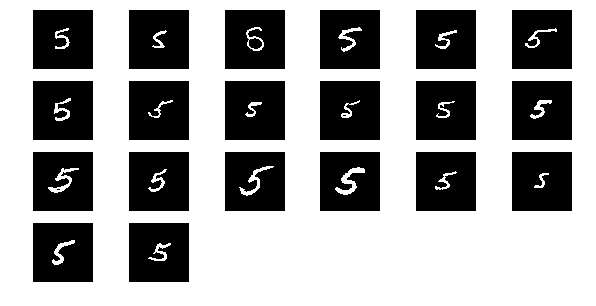

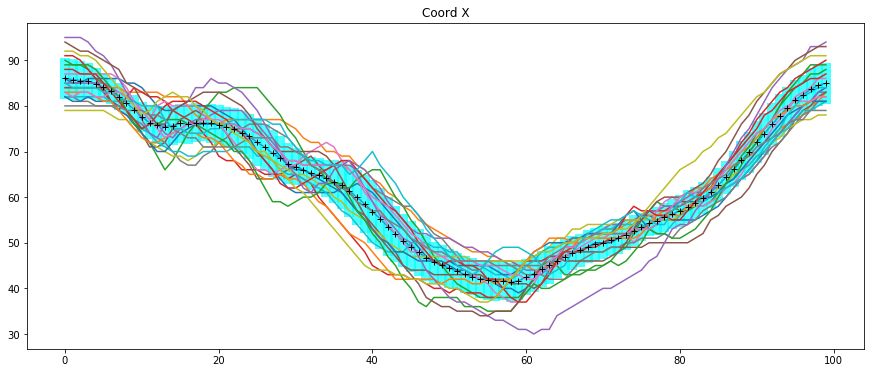

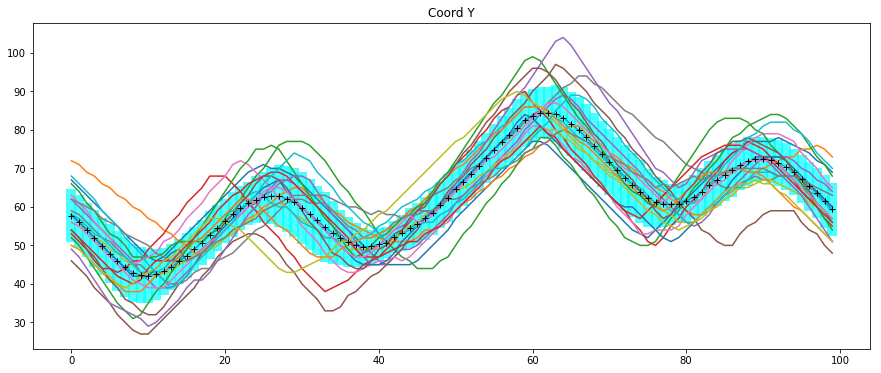

In [6]:
"""
Função principal 
"""

def process (list_images):
    gridVisualize(list_images,6,(10,5))
    ##
    numbins = 100
    list_con = []
    arr_xx = np.arange(0,numbins)
    for img in list_images:
        aContour = extractContours.extract_contours(img)
        c = fun(aContour[0],numbins) # problem type in aContour
        list_con.append(c)
    array_con = np.array(list_con)
    ##
    mm = np.mean(array_con,axis=0)
    std = np.std(array_con,axis=0)
    ##
    plt.rcParams["figure.figsize"] = [15,6]
    for idx,title in zip([1,2],["Coord X","Coord Y"]):
        fig = plt.figure()
        ax = fig.add_subplot(111)
        for contour in array_con:
            ax.plot(arr_x, contour[:,idx])
        ax.plot(arr_x, mm[:,idx],'+', color="black")
        plt.title(title)
        plt.errorbar(arr_x,mm[:,idx],yerr=std[:,idx],ecolor='cyan',elinewidth=10,zorder=-1,alpha=0.7)
        plt.show()
    
"""
###
# Example para imagens aleatórias 
#
"""    

for c in range(3,6):
    list_images = [];
    for i in range(c*100,c*100+20):
        list_images.append(dataset['bitmaps'][i])
    process(list_images)